In [1]:
# import numpy as np
# import sys
# import matplotlib.pyplot as plt
from MFEA_lib.model.mfea import *
from MFEA_lib.model.utils import saveModel, loadModel, compareModel
from MFEA_lib.operators.CrossOver import SBX_CrossOver
from MFEA_lib.operators.Selection import ElitismSelection
from MFEA_lib.operators.Mutation import Polynomial_Mutation, NoMutation
from MFEA_lib.tasks.Benchmark import CEC17_benchmark, GECCO20_benchmark_50tasks

#### Build model

#### Benchmark

##### CEC17

In [2]:
cec17_10tasks = CEC17_benchmark.get_10tasks_benchmark()

In [3]:
cross_over = SBX_CrossOver(nc = 2)
mutation= Polynomial_Mutation(nm = 5)
selection= ElitismSelection()

In [4]:
# model1 = MFEA1()
# model1.compile(
#     cross_over= cross_over,
#     mutation= mutation,
#     selection= selection
# )

# sol1, his1 = model1.fit(tasks= cec17_10tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3, 
#                         evaluate_initial_skillFactor= True, num_epochs_printed= 10)

# saveModel(model1, "./RESULTS/cec17_mfea1.mso")

In [5]:
# base_model = MFEA_base()
# base_model.compile(
#     cross_over= cross_over,
#     mutation= mutation,
#     selection= selection
# )
# base_sol, base_his = base_model.fit(tasks= cec17_10tasks, num_generations= 1000, num_inds_each_task= 100, rmp =0.3,
#                                 evaluate_initial_skillFactor= True, num_epochs_printed= 10)

# saveModel(base_model, "./RESULTS/cec17_mfeabase.mso")

In [6]:
sa_model = SA_MFEA()
sa_model.compile(
    cross_over= cross_over,
    # mutation= mutation,
    mutation = NoMutation(),
    selection= selection
)
sa_sol, sa_his = sa_model.fit(tasks= cec17_10tasks, MAXEVALS= 100000 * len(cec17_10tasks), num_inds_each_task= 100, nb_inds_min = None, H = 30, sigmoid = 0.1,
                    evaluate_initial_skillFactor= False)

saveModel(sa_model, "./RESULTS/cec17_sa_mfea.mso")

Epoch 1000, [====================>] 100% ,pop_size: 1000, func_val: [2.0176335598354803e-09, 1.66762337275304e-10, 2.2726756442778854e-11, 0.0, 2.136994474288993e-07, 3.784662358174984e-06, 0.00084252922658834, 0.0006363817774399649, 6.796330165315112e-11, 42.78415576972844]9]78479189984142]74]]]]

'Saved'

In [7]:
lsa_model = SA_MFEA()
lsa_model.compile(
    cross_over= cross_over,
    # mutation= mutation,
    mutation = NoMutation(),
    selection= selection
)
lsa_sol, lsa_his = lsa_model.fit(tasks= cec17_10tasks, MAXEVALS= 1000000, num_inds_each_task= 100, nb_inds_min= 50, H = 30, sigmoid = 0.1,
                                evaluate_initial_skillFactor= True)

saveModel(lsa_model, "./RESULTS/cec17_lsa_mfea.mso")

Epoch 1000, [====================>] 100% ,pop_size: 495, func_val: [9.475622919500582e-16, 4.831616224120813e-17, 1.9772343528956141e-19, 0.0, 1.1521133418043422e-13, 1.8590360362225056e-09, 1.5382966012111865e-09, 0.0006363783177221194, 0.0, 62.68235505980368].682355059814995]]]7883456]456]4]4]]

'Saved'

In [8]:
print(sa_model.history_cost[-1], "\n", lsa_model.history_cost[-1])


[2.01763356e-09 1.66762337e-10 2.27267564e-11 0.00000000e+00
 2.13699447e-07 3.78466236e-06 8.42529227e-04 6.36381777e-04
 6.79633017e-11 4.27841558e+01] 
 [9.47562292e-16 4.83161622e-17 1.97723435e-19 0.00000000e+00
 1.15211334e-13 1.86776505e-09 1.53829660e-09 6.36378318e-04
 0.00000000e+00 6.26823551e+01]


In [9]:
model1 = loadModel("./RESULTS/cec17_mfea1.mso")

base_model = loadModel("./RESULTS/cec17_mfeabase.mso")

sa_model = loadModel("./RESULTS/cec17_sa_mfea.mso")

lsa_model = loadModel("./RESULTS/cec17_lsa_mfea.mso")

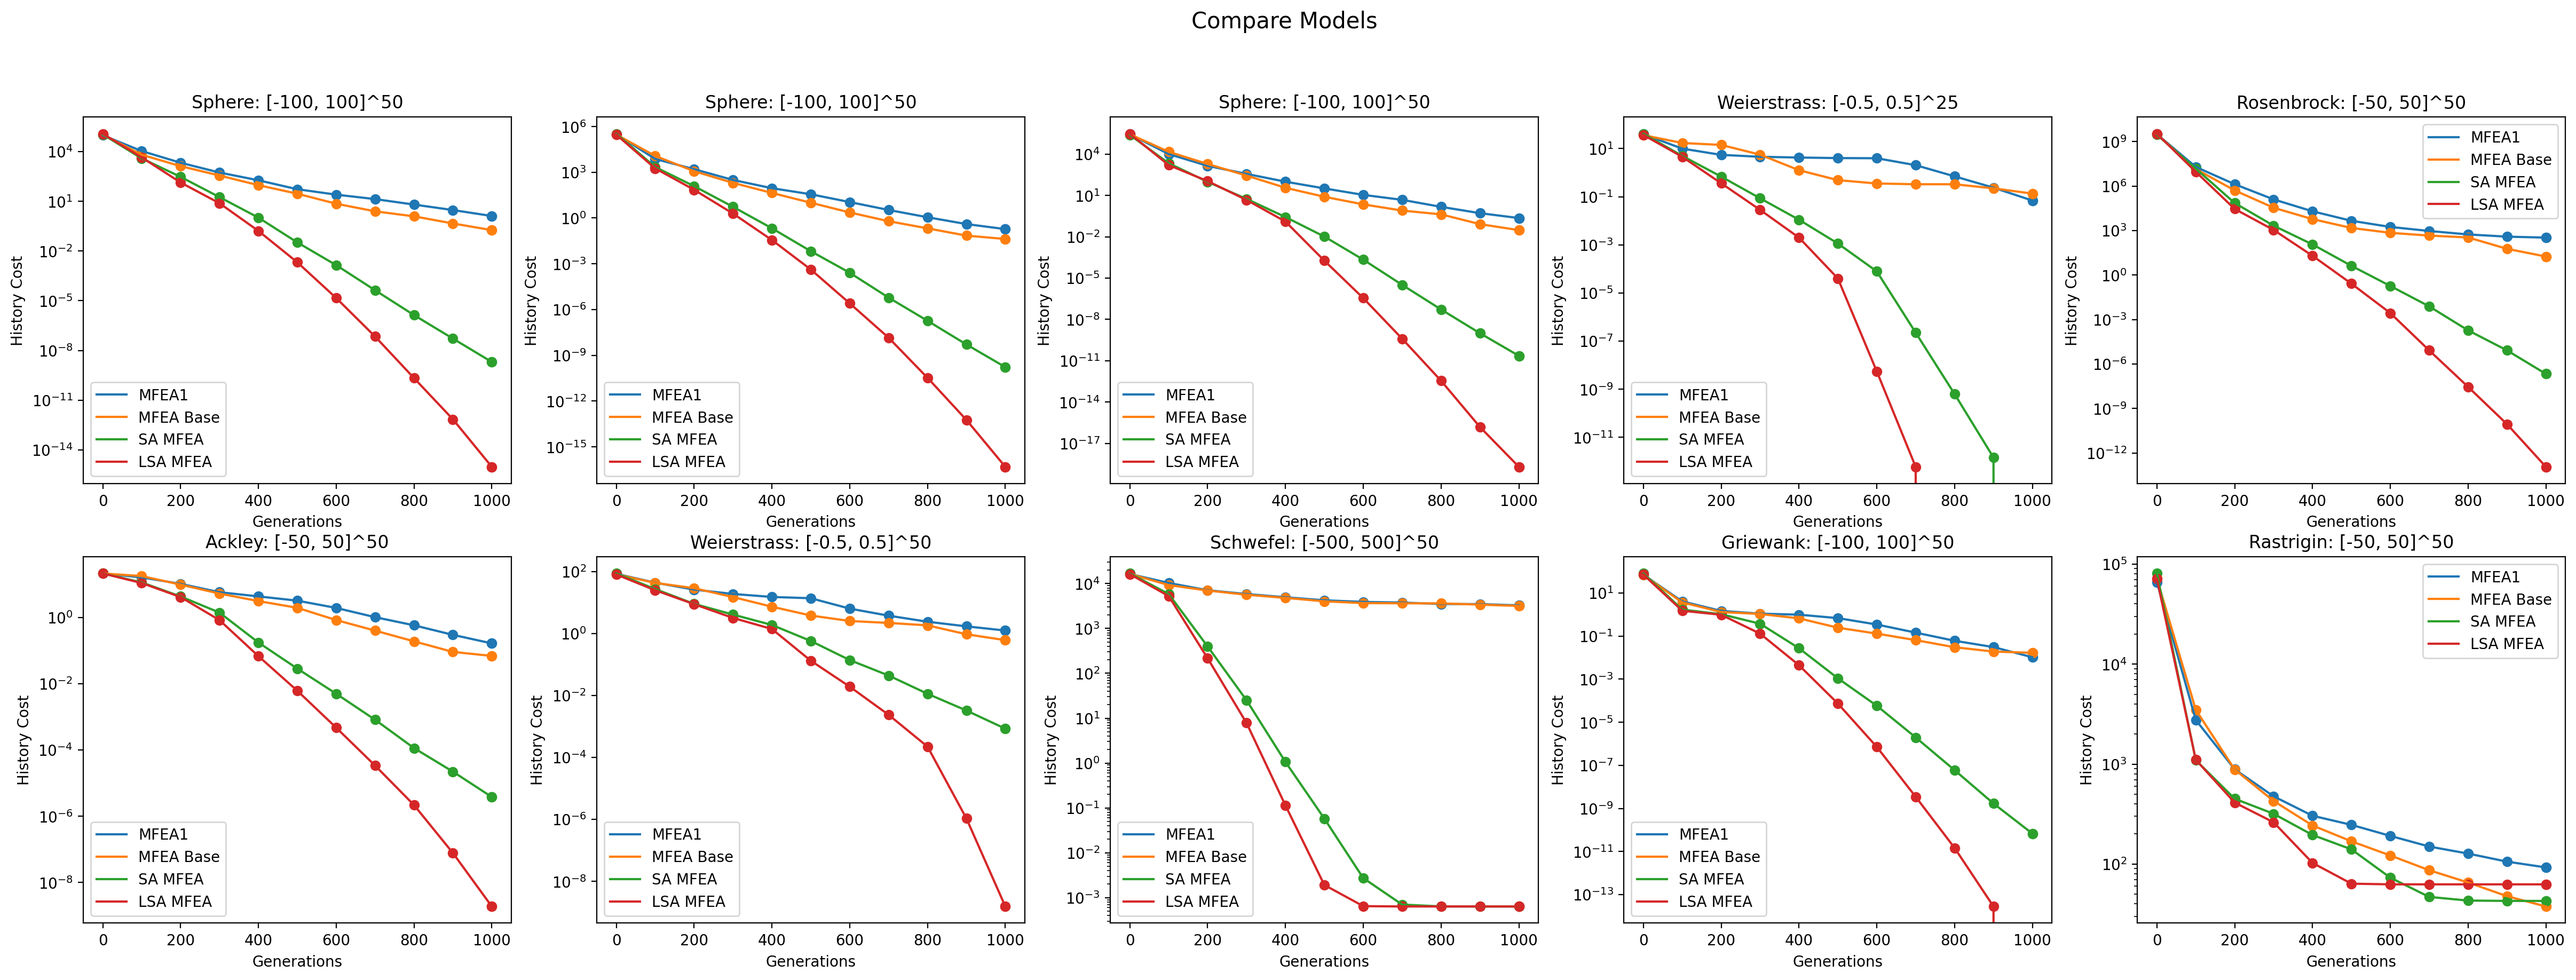

In [10]:
compareModel(
    models= [model1, base_model, sa_model, lsa_model],
    label_legend=  ["MFEA1", "MFEA Base", "SA MFEA", "LSA MFEA"],
    tasks= cec17_10tasks,
    shape= (2, 5),
    step= 100,
    yscale= 'log'
)
print()

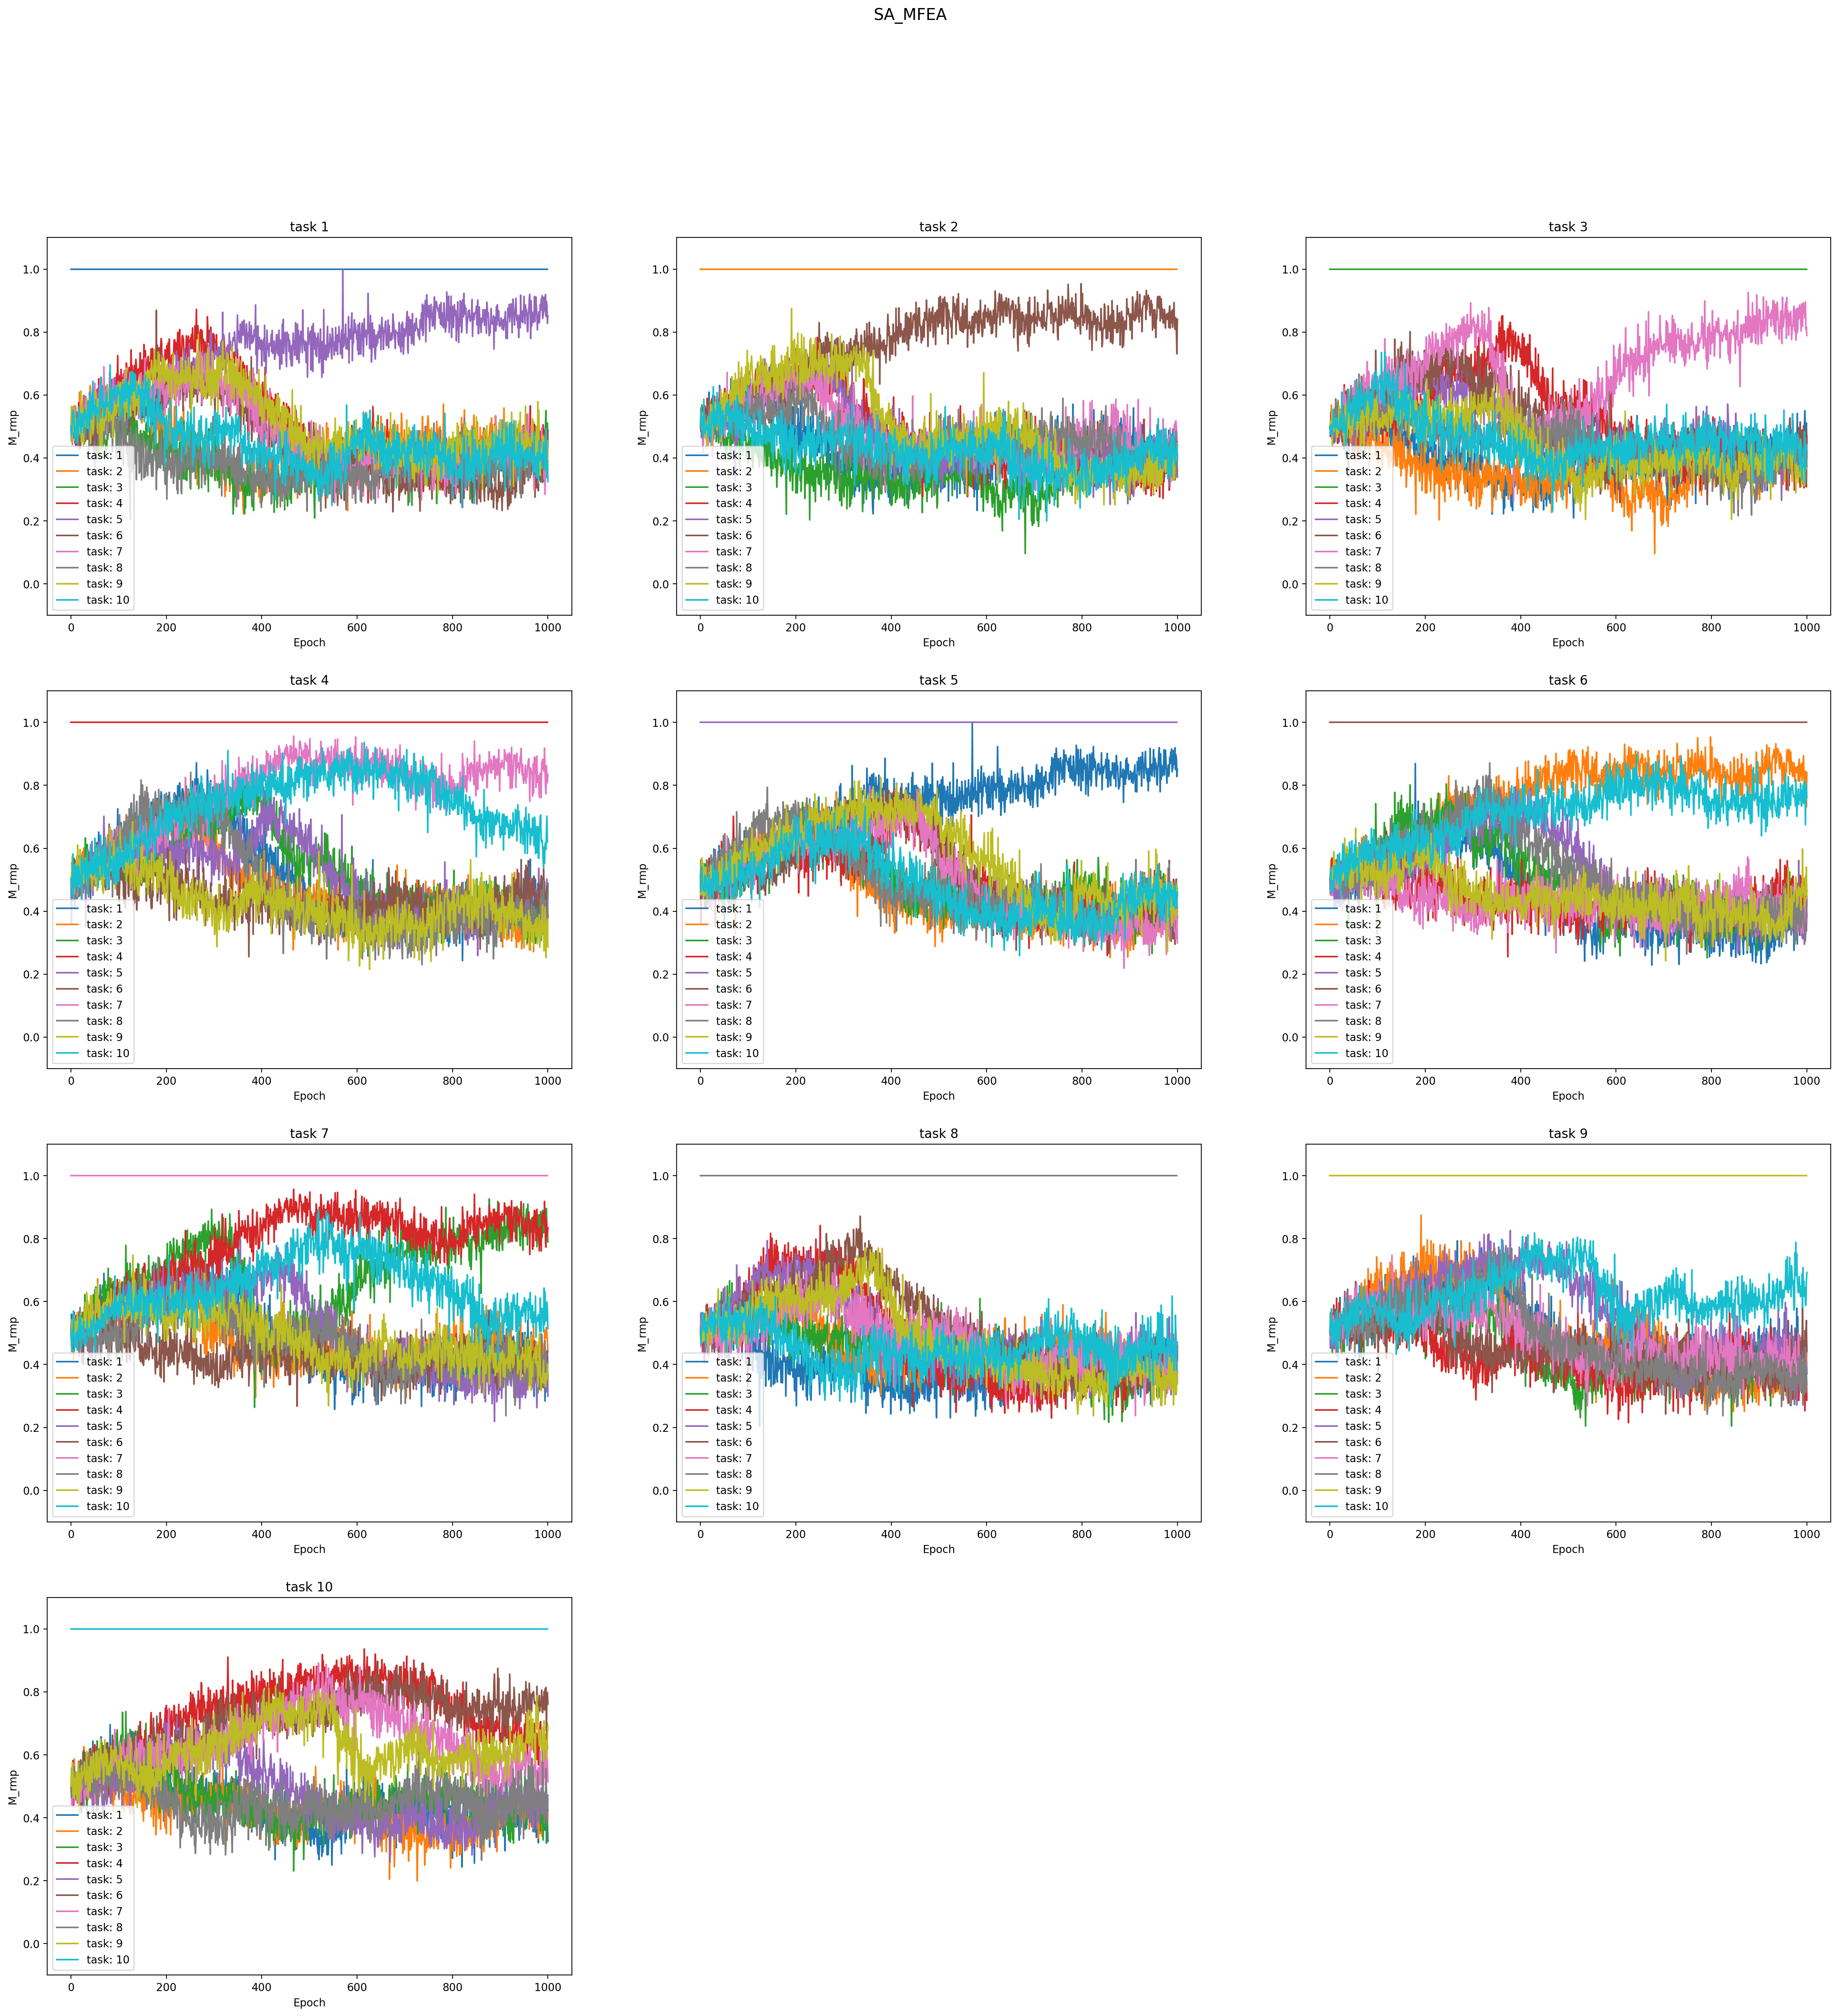

In [11]:
sa_model.renderRMP()
print()

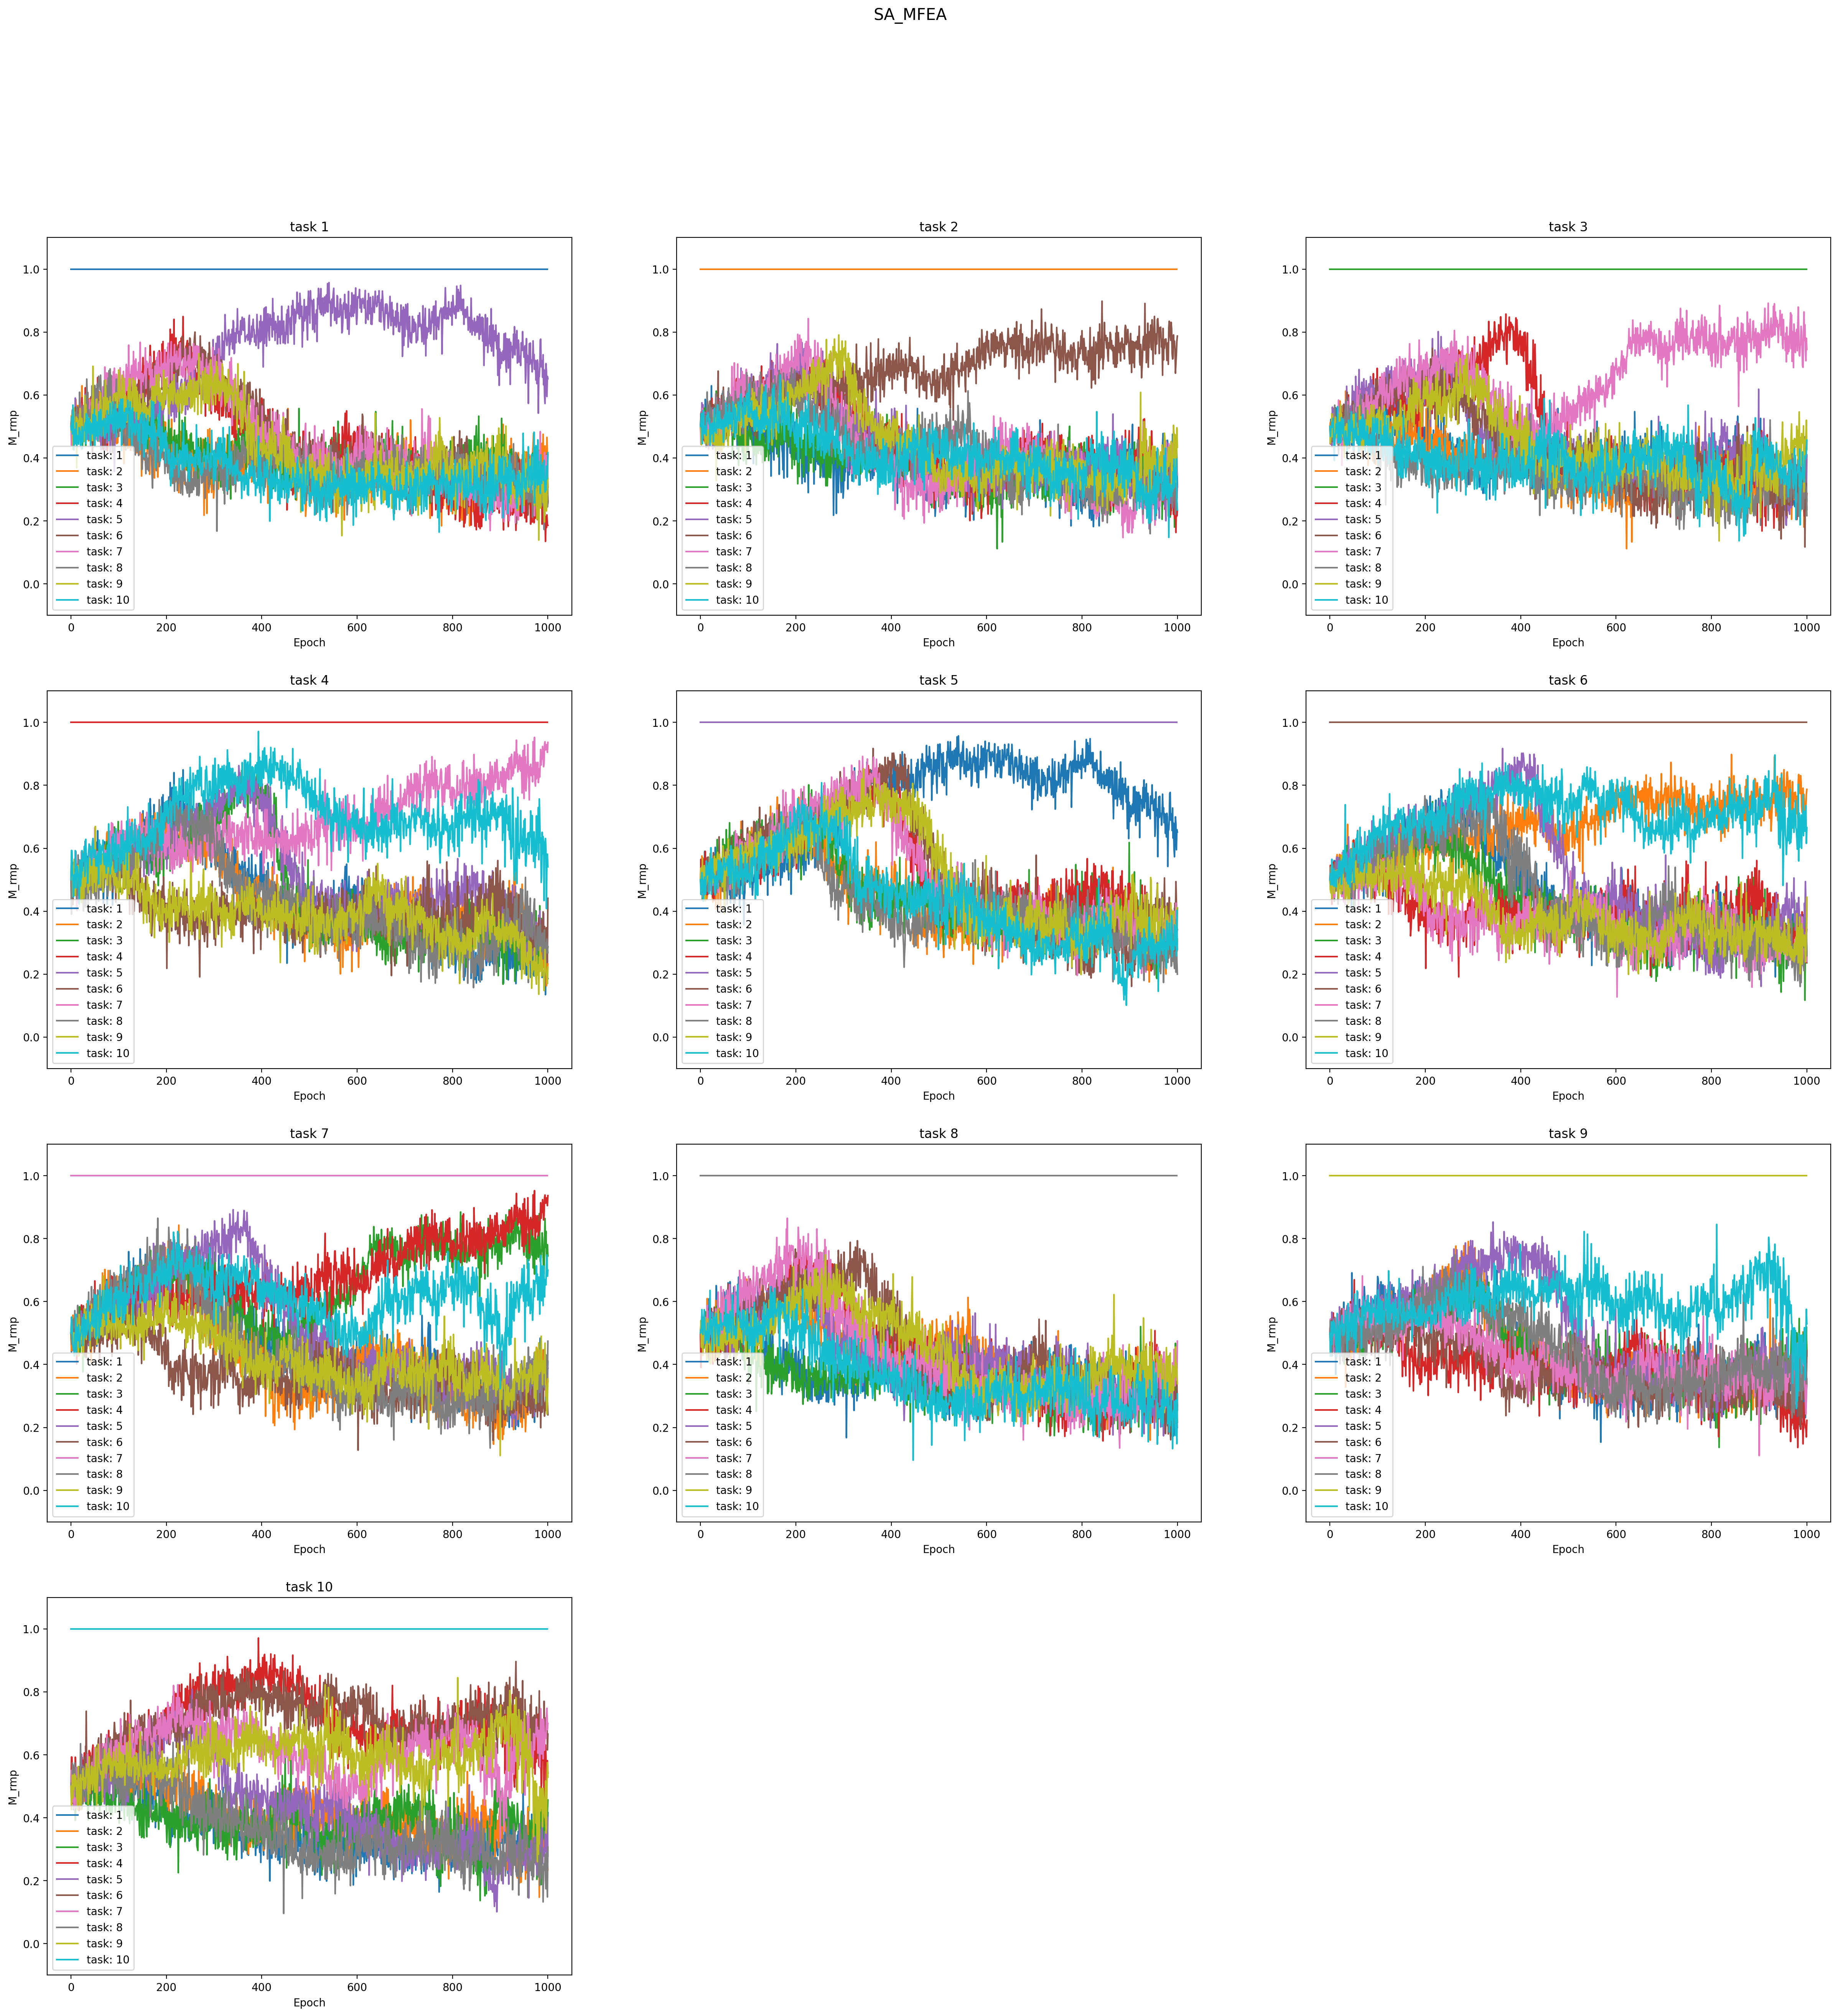

In [12]:
lsa_model.renderRMP()
print()

#### GECCO 20
